In [23]:
# 1. Daily Energy Intake

from scipy.stats import t
# Null hypothesis: The average energy intake is 7725 kJ
# alpha = 0.05
ALPHA = 0.05
POPULATION_MEAN = 7725

# List for energy intake of women
energyIntake = [5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770]

# Calculate the mean of the energy intake
mean = sum(energyIntake) / len(energyIntake)

# Degrees of freedom
df = len(energyIntake) - 1

# Calculate the standard deviation of the energy intakeC
std_dev = (sum((x - mean) ** 2 for x in energyIntake) / df ) ** 0.5

# Calculate the standard error of the mean
std_error = std_dev / (len(energyIntake) ** 0.5)

# Calculate the t-statistic
t_statistic = (mean - POPULATION_MEAN) / std_error

# Calculate the p-value
pValue = 2 * t.cdf(-abs(t_statistic), df)

print("Mean = ", mean)
print("Standard Deviation = ", std_dev)
print("Standard Error = ", std_error)
print("Degrees of freedom = ", df)
print("t_statistic = ", t_statistic)
print("p_value = ", pValue)

# compare p_value with alpha
if pValue < ALPHA:
    print("Reject the null hypothesis as the values of pValue is: ", pValue , " which is less than alpha: ", ALPHA)
else: 
    print("Fail to reject the null hypothesis as the values of pValue is: ", pValue , " which is greater than alpha: ", ALPHA)

Mean =  6753.636363636364
Standard Deviation =  1142.1232221373727
Standard Error =  344.3631083801271
Degrees of freedom =  10
t_statistic =  -2.8207540608310198
p_value =  0.018137235176105812
Reject the null hypothesis as the values of pValue is:  0.018137235176105812  which is less than alpha:  0.05


In [35]:
# 2. Guiness Enjoyment
import pandas as pd
import xlrd
import numpy as np
from scipy.stats import t

# Create a df with columns for Location, Sample Size, Mean, and Standard Deviation
data = {'Location': ['Ireland', 'Elsewhere'], 'Sample Size': [42, 61], 'Mean': [74, 57], 'Standard Deviation': [7.4, 7.1]}
df = pd.DataFrame(data)

# alpha = 0.05
ALPHA = 0.05

# degrees of freedom for two sample t-test with unequal variances
degrees_of_freedom_num = (df['Standard Deviation'][0] ** 2 / df['Sample Size'][0] + df['Standard Deviation'][1] ** 2 / df['Sample Size'][1]) ** 2 
degrees_of_freedom_denom = ((df['Standard Deviation'][0] ** 2 / df['Sample Size'][0]) ** 2 / (df['Sample Size'][0] - 1) + (df['Standard Deviation'][1] ** 2 / df['Sample Size'][1]) ** 2 / (df['Sample Size'][1] - 1))
degrees_of_freedom = degrees_of_freedom_num / degrees_of_freedom_denom
# Manually calculate two sample t-test
tStat = (df['Mean'][0] - df['Mean'][1]) / ((df['Standard Deviation'][0] ** 2 / df['Sample Size'][0] + df['Standard Deviation'][1] ** 2 / df['Sample Size'][1]) ** 0.5)

# Get the p-value for two sample t-test
p = t.cdf(-abs(tStat), degrees_of_freedom)
print("t_statistic = ", tStat)
print("p_value = ", p)


t_statistic =  11.647653131319812
p_value =  1.1579450814371138e-19


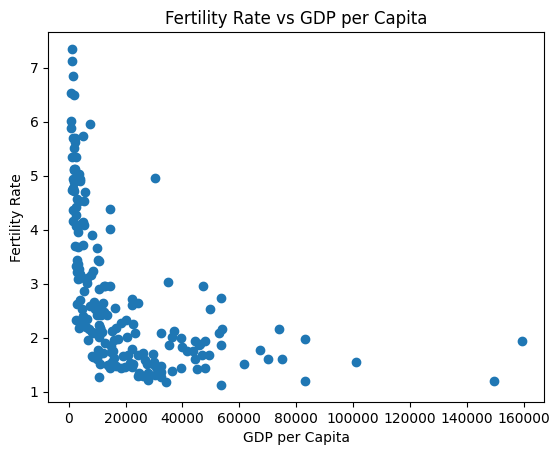

Correlation between GDP per Capita and Fertility Rate:  -0.4998136507414493


In [25]:
# 3. Fertility vs GDP

import matplotlib.pyplot as plt
import pandas as pd

# Get API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_31824.xls
GDPPPP = pd.read_excel('API_NY.GDP.PCAP.PP.CD_DS2_en_excel_v2_31824.xls', sheet_name='Data', skiprows=3)
# Get API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls
fertility = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls', sheet_name='Data', skiprows=3)

# Get Country Metadata
countryMetadata = pd.read_excel('API_SP.DYN.TFRT.IN_DS2_en_excel_v2_946.xls', sheet_name='Metadata - Countries')
# Remove all rows in countryMetadata that have an empty Region column
countryMetadata = countryMetadata.dropna(subset=['Region'])
# Remove all columns in countryMetadata except for TableName
countryMetadata = countryMetadata[['TableName']]

# Remove all rows from fertility that have an empty 2013
fertility = fertility.dropna(subset=['2013'])
# Remove all columns from fertility except for Country Name and 2013
fertility = fertility[['Country Name', '2013']]

# Remove all rows from GDPPPP that have an empty 2013
GDPPPP = GDPPPP.dropna(subset=['2013'])
# Remove all columns from GDPPPP except for Country Name and 2013
GDPPPP = GDPPPP[['Country Name', '2013']]

# Merge fertility and GDPPPP on Country Name
merged = pd.merge(fertility, GDPPPP, on='Country Name')
# Remove all rows from merged that have an empty 2013_x or 2013_y
merged = merged.dropna(subset=['2013_x', '2013_y'])
# Only keep rows in merged where Country name is in countryMetadata's TableName column
merged = merged[merged['Country Name'].isin(countryMetadata['TableName'])]

# make a scattr plot, x-axis is GDP, y-axis is fertility

plt.scatter(merged['2013_y'], merged['2013_x'])
plt.xlabel('GDP per Capita')
plt.ylabel('Fertility Rate')
plt.title('Fertility Rate vs GDP per Capita')
plt.show()

# Calculate the correlation between GDP per Capita and Fertility Rate
correlation = merged['2013_y'].corr(merged['2013_x'])
print("Correlation between GDP per Capita and Fertility Rate: ", correlation)


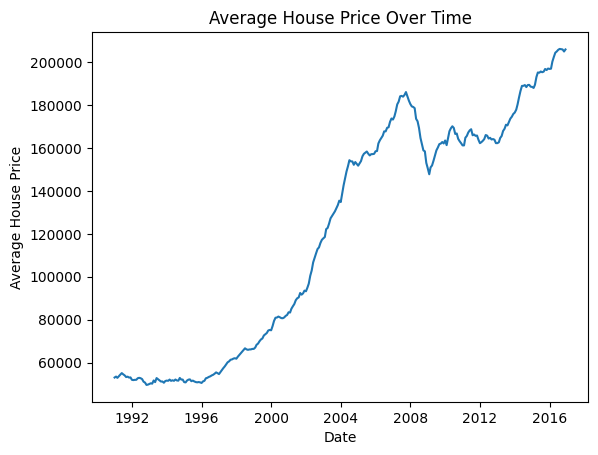

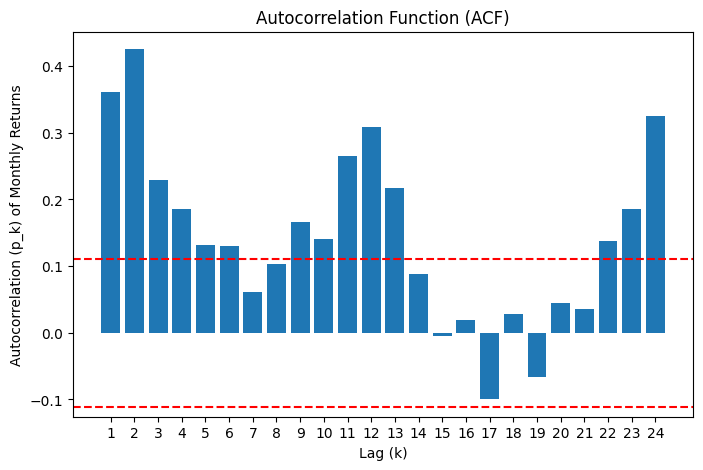

Annualized return:  5.35423853535919


In [36]:
#4. Housing prices

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

# Read the data from the xls file MonthlyAverageHousePrice.xls
housingData = pd.read_excel('MonthlyAverageHousePrice.xls', sheet_name='Monthly')

# Change first column name to 'Date' and keep all other column names
housingData.columns = ['Date'] + list(housingData.columns[1:])

# Remove all rows where Date is before 1991 and after 2016
housingData = housingData[housingData['Date'] >= '1991-01-01']
housingData = housingData[housingData['Date'] <= '2016-12-01']

# Consturct autocrrelation function of the monthly returns defined as r(t) = (P(t) - P(t-1)) / P(t-1)
housingData['Monthly Return'] = (housingData['Average House Price'] - housingData['Average House Price'].shift(1)) / housingData['Average House Price'].shift(1)

# Plot the autocorrelation
autocorr = acf(housingData['Monthly Return'].dropna(), 20)

# get rid of first autocorrelation column
autocorr = autocorr[1:]

lags = np.arange(len(autocorr))
lags = lags + 1

# get significant lags via +-1.96/sqrt(n)
n = len(housingData['Monthly Return'])

# plot Average House Price Over Time
plt.title('Average House Price Over Time')
plt.xlabel('Date')
plt.ylabel('Average House Price')
plt.plot(housingData['Date'], housingData['Average House Price'])

# plot line to show the minimum for significant lags bar graph
plt.figure(figsize=(8, 5))
plt.bar(lags, autocorr)
plt.axhline(y=1.96 / n ** 0.5, color='r', linestyle='--')
plt.axhline(y=-1.96 / n ** 0.5, color='r', linestyle='--')
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lag (k)')
plt.ylabel('Autocorrelation (p_k) of Monthly Returns')
plt.xticks(lags)
plt.show()

# Get annualized return Ret = E/B ^(1/num years) -1
annualized_return = ((housingData['Average House Price'].iloc[-1] / housingData['Average House Price'].iloc[0]) ** (1 / (len(housingData) / 12)) - 1)*100
print("Annualized return: ", annualized_return)

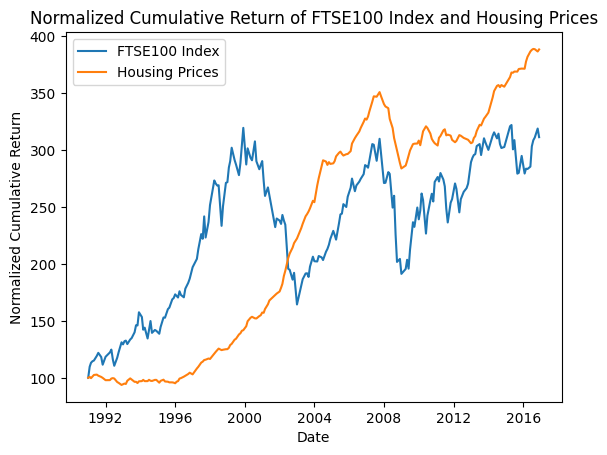

Annualized return:  4.462515478640672


In [30]:
# 5. Stock Returns

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import acf

# Read the data from the csv file FTSE100Index.csv
stockData = pd.read_csv('FTSE100.csv')

# Remove all rows where Date is before 1992 and after 2016

stockData['Date'] = pd.to_datetime(stockData['Date'])
stockData = stockData[stockData['Date'] >= '1991-01-01']
stockData = stockData[stockData['Date'] <= '2016-12-01']

# sort by earliest date
stockData = stockData.sort_values(by='Date')

# Get cumalative returns based off Adjclose column
stockData['Cumulative Return'] = stockData['Adj Close'] / stockData['Adj Close'].iloc[0]

# Normalize cumalitive sum of returns to start at 100
stockData['Normalized Cumulative Return'] = stockData['Cumulative Return'] * 100

housingData = housingData

# Get cumalitive return from housing data 
housingData['Cumulative Return'] = housingData['Average House Price'] / housingData['Average House Price'].iloc[0]

# Normalize cumalitive sum of returns to start at 100
housingData['Normalized Cumulative Return'] = housingData['Cumulative Return'] * 100

# convert date column to datetime
stockData['Date'] = pd.to_datetime(stockData['Date'])
housingData['Date'] = pd.to_datetime(housingData['Date'])

# Merge the stockData and housingData on Date
merged = pd.merge(stockData, housingData, on='Date', how='inner')

# Plot the normalized cumulative returns as two seperate lines vs time

plt.plot(merged['Date'], merged['Normalized Cumulative Return_x'], label='FTSE100 Index')
plt.plot(merged['Date'], merged['Normalized Cumulative Return_y'], label='Housing Prices')

plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.title('Normalized Cumulative Return of FTSE100 Index and Housing Prices')
plt.legend(['FTSE100 Index', 'Housing Prices'])
plt.show()


annualized_return = ((stockData['Adj Close'].iloc[-1] / stockData['Adj Close'].iloc[0]) ** (1 / (len(stockData) / 12)) - 1)*100
print("Annualized return: ", annualized_return)

